<a href="https://www.kaggle.com/code/araspirbadian/hotel-booking-prediction-with-svm?scriptVersionId=96794751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Hotel Booking prediction with SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
import warnings
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("../input/hotel-booking/hotel_booking.csv")

In [ ]:
data.head()

# Handling the missing data


In [ ]:
data.isnull().sum()

In [ ]:
data.drop(['company', 'agent'], axis = 1, inplace = True)
data.isnull().sum()

In [ ]:
data[data['children'].isnull()]

Dropping rows with children as NAN

In [ ]:
data['children'][data['children'].isnull()] = data['children'].mean()

In [ ]:
data.isnull().sum()

Converting categorical to numbers and dropping the columns that won't be useful

In [ ]:
data.info()

In [ ]:
#data_co = data.copy()
data.drop(['name', 'email', 'phone-number', 'credit_card', 'arrival_date_month', 'reservation_status_date', 'reservation_status' ], axis = 1, inplace= True)
data['market_segment'] = pd.factorize(data['market_segment'])[0] + 1
data['deposit_type'] = pd.factorize(data['deposit_type'])[0] + 1
data['assigned_room_type'] = pd.factorize(data['assigned_room_type'])[0] + 1
data['customer_type'] = pd.factorize(data['customer_type'])[0] + 1
data['distribution_channel'] = pd.factorize(data['distribution_channel'])[0] + 1
data['reserved_room_type'] = pd.factorize(data['reserved_room_type'])[0] + 1
data['meal'] = pd.factorize(data['meal'])[0] + 1
data['country'] = pd.factorize(data['country'])[0] + 1
data['hotel'] = pd.factorize(data['hotel'])[0] + 1
data.head()

Checking the correlations

In [ ]:
fig = plt.figure( figsize = (10,10))
data_corr = data.corr( method = 'pearson')
sns.heatmap(data_corr, cmap='Wistia', linecolor='black', linewidths=2)

In [ ]:
data.info()

Making the train and test datasets and sclaing them

In [ ]:
y_all = data['is_canceled']
x_all = data.drop('is_canceled', axis = 1 , inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.1, random_state=101)

In [ ]:
scaler_train= StandardScaler()
scaler_train.fit(x_train)
scaler_test= StandardScaler()
scaler_test.fit(x_test)
x_train_scaled = scaler_train.transform(x_train)
x_test_scaled = scaler_test.transform(x_test)

In [ ]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict ( x_test) 
confusion_matrix( y_test, y_pred) 
print(classification_report(y_test, y_pred))

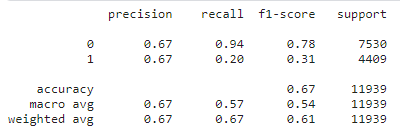

In [ ]:
svm = SVC()
param_grid = {'C':[1, 10, 100],'gamma':[1, 0.1],'kernel':['linear']}
grid = GridSearchCV(svm, param_grid, cv = 5)
grid.fit( x_train, y_train)

In [ ]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
y_pred_grid= grid.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred_grid)